# Personal Loan Problem using SuperVised Learning Algorithm

##### Import the necessary Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization


#####  Load the File

In [37]:
data= pd.read_csv("Bank_Personal_Loan_Modelling.csv")

#### Check the Shape and Print the data

In [38]:
data.shape

(5000, 14)

In [39]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Get the Data Info. All the variables are numeric

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### There are no null values

In [41]:
data.isnull().values.any()


False

In [42]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Describe the Data

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Find the outliers using Box Plot. Income,Mortgage,CCAvg has got outliers

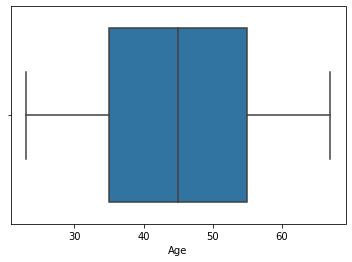

In [44]:
sns.boxplot(data['Age'])

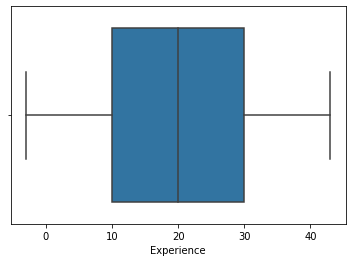

In [45]:
sns.boxplot(data['Experience'])

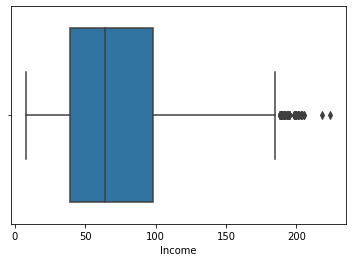

In [46]:
sns.boxplot(data['Income'])

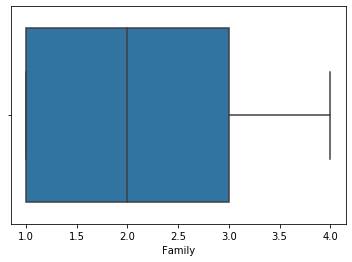

In [47]:
sns.boxplot(data['Family'])

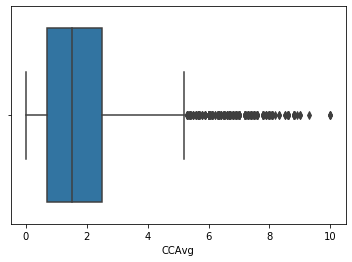

In [48]:
sns.boxplot(data['CCAvg'])

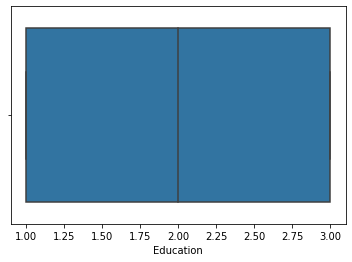

In [49]:
sns.boxplot(data['Education'])

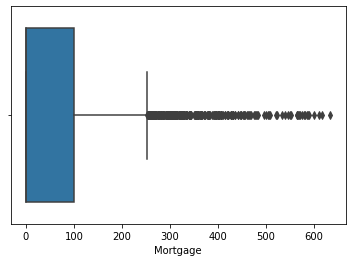

In [50]:
sns.boxplot(data['Mortgage'])

#### Treat the outliers of Income field with IQR. 96 rows which are outliers are treated with a cap value. Mortgage and CCAvg are correlated to the target variable.So it is not treated

In [16]:
up_whisk=data["Income"].quantile(0.75)+1.5*(data["Income"].quantile(0.75) - data["Income"].quantile(0.25))
print(up_whisk)

for i in data['Income']:
    if(i > up_whisk):
        data['Income']=data['Income'].replace(i,up_whisk)

186.5


In [17]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1,0


#### Verify the outlier is treated. 

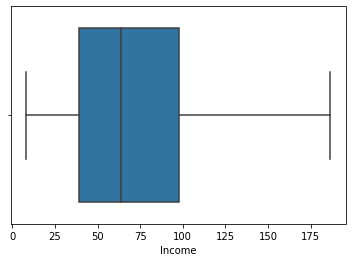

In [18]:
sns.boxplot(data['Income'])

## As the experience variable has negative value, it is not relevant.So convert to 0

In [18]:
for i in data['Experience']:
    if(i < 0):
        data['Experience']=data['Experience'].replace(i,0)

#### Drop the irrelevant variable

In [19]:
data.drop(['ID','ZIP Code'],axis = 1, inplace=True)



In [20]:
data.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### Check the distribution of each variable using count plot

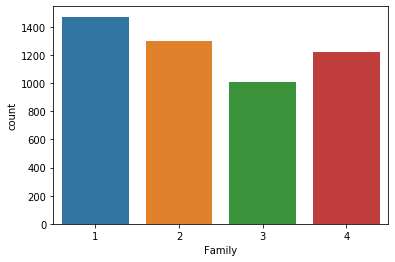

In [21]:
sns.countplot(x = data['Family'])

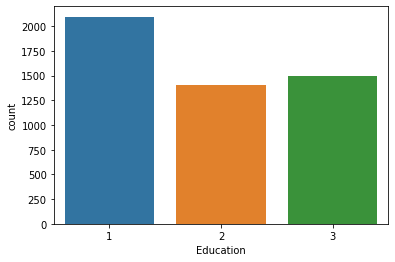

In [22]:
sns.countplot(x = data['Education'])

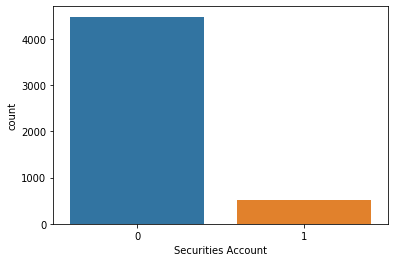

In [22]:
sns.countplot(x = data['Securities Account']) 

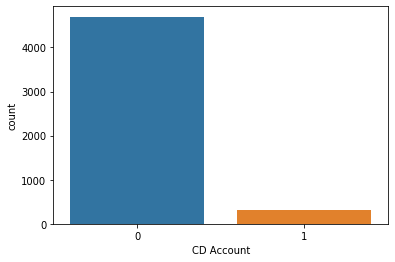

In [23]:
sns.countplot(x = data['CD Account'])

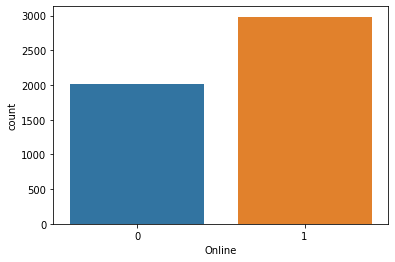

In [24]:
sns.countplot(x = data['Online'])

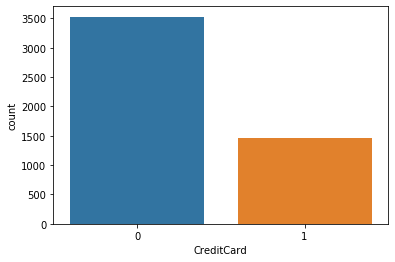

In [25]:
sns.countplot(x = data['CreditCard'])

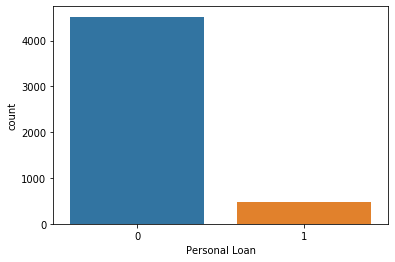

In [26]:
sns.countplot(x = data['Personal Loan'])

### Use the pairplot to identify correlation of each variable

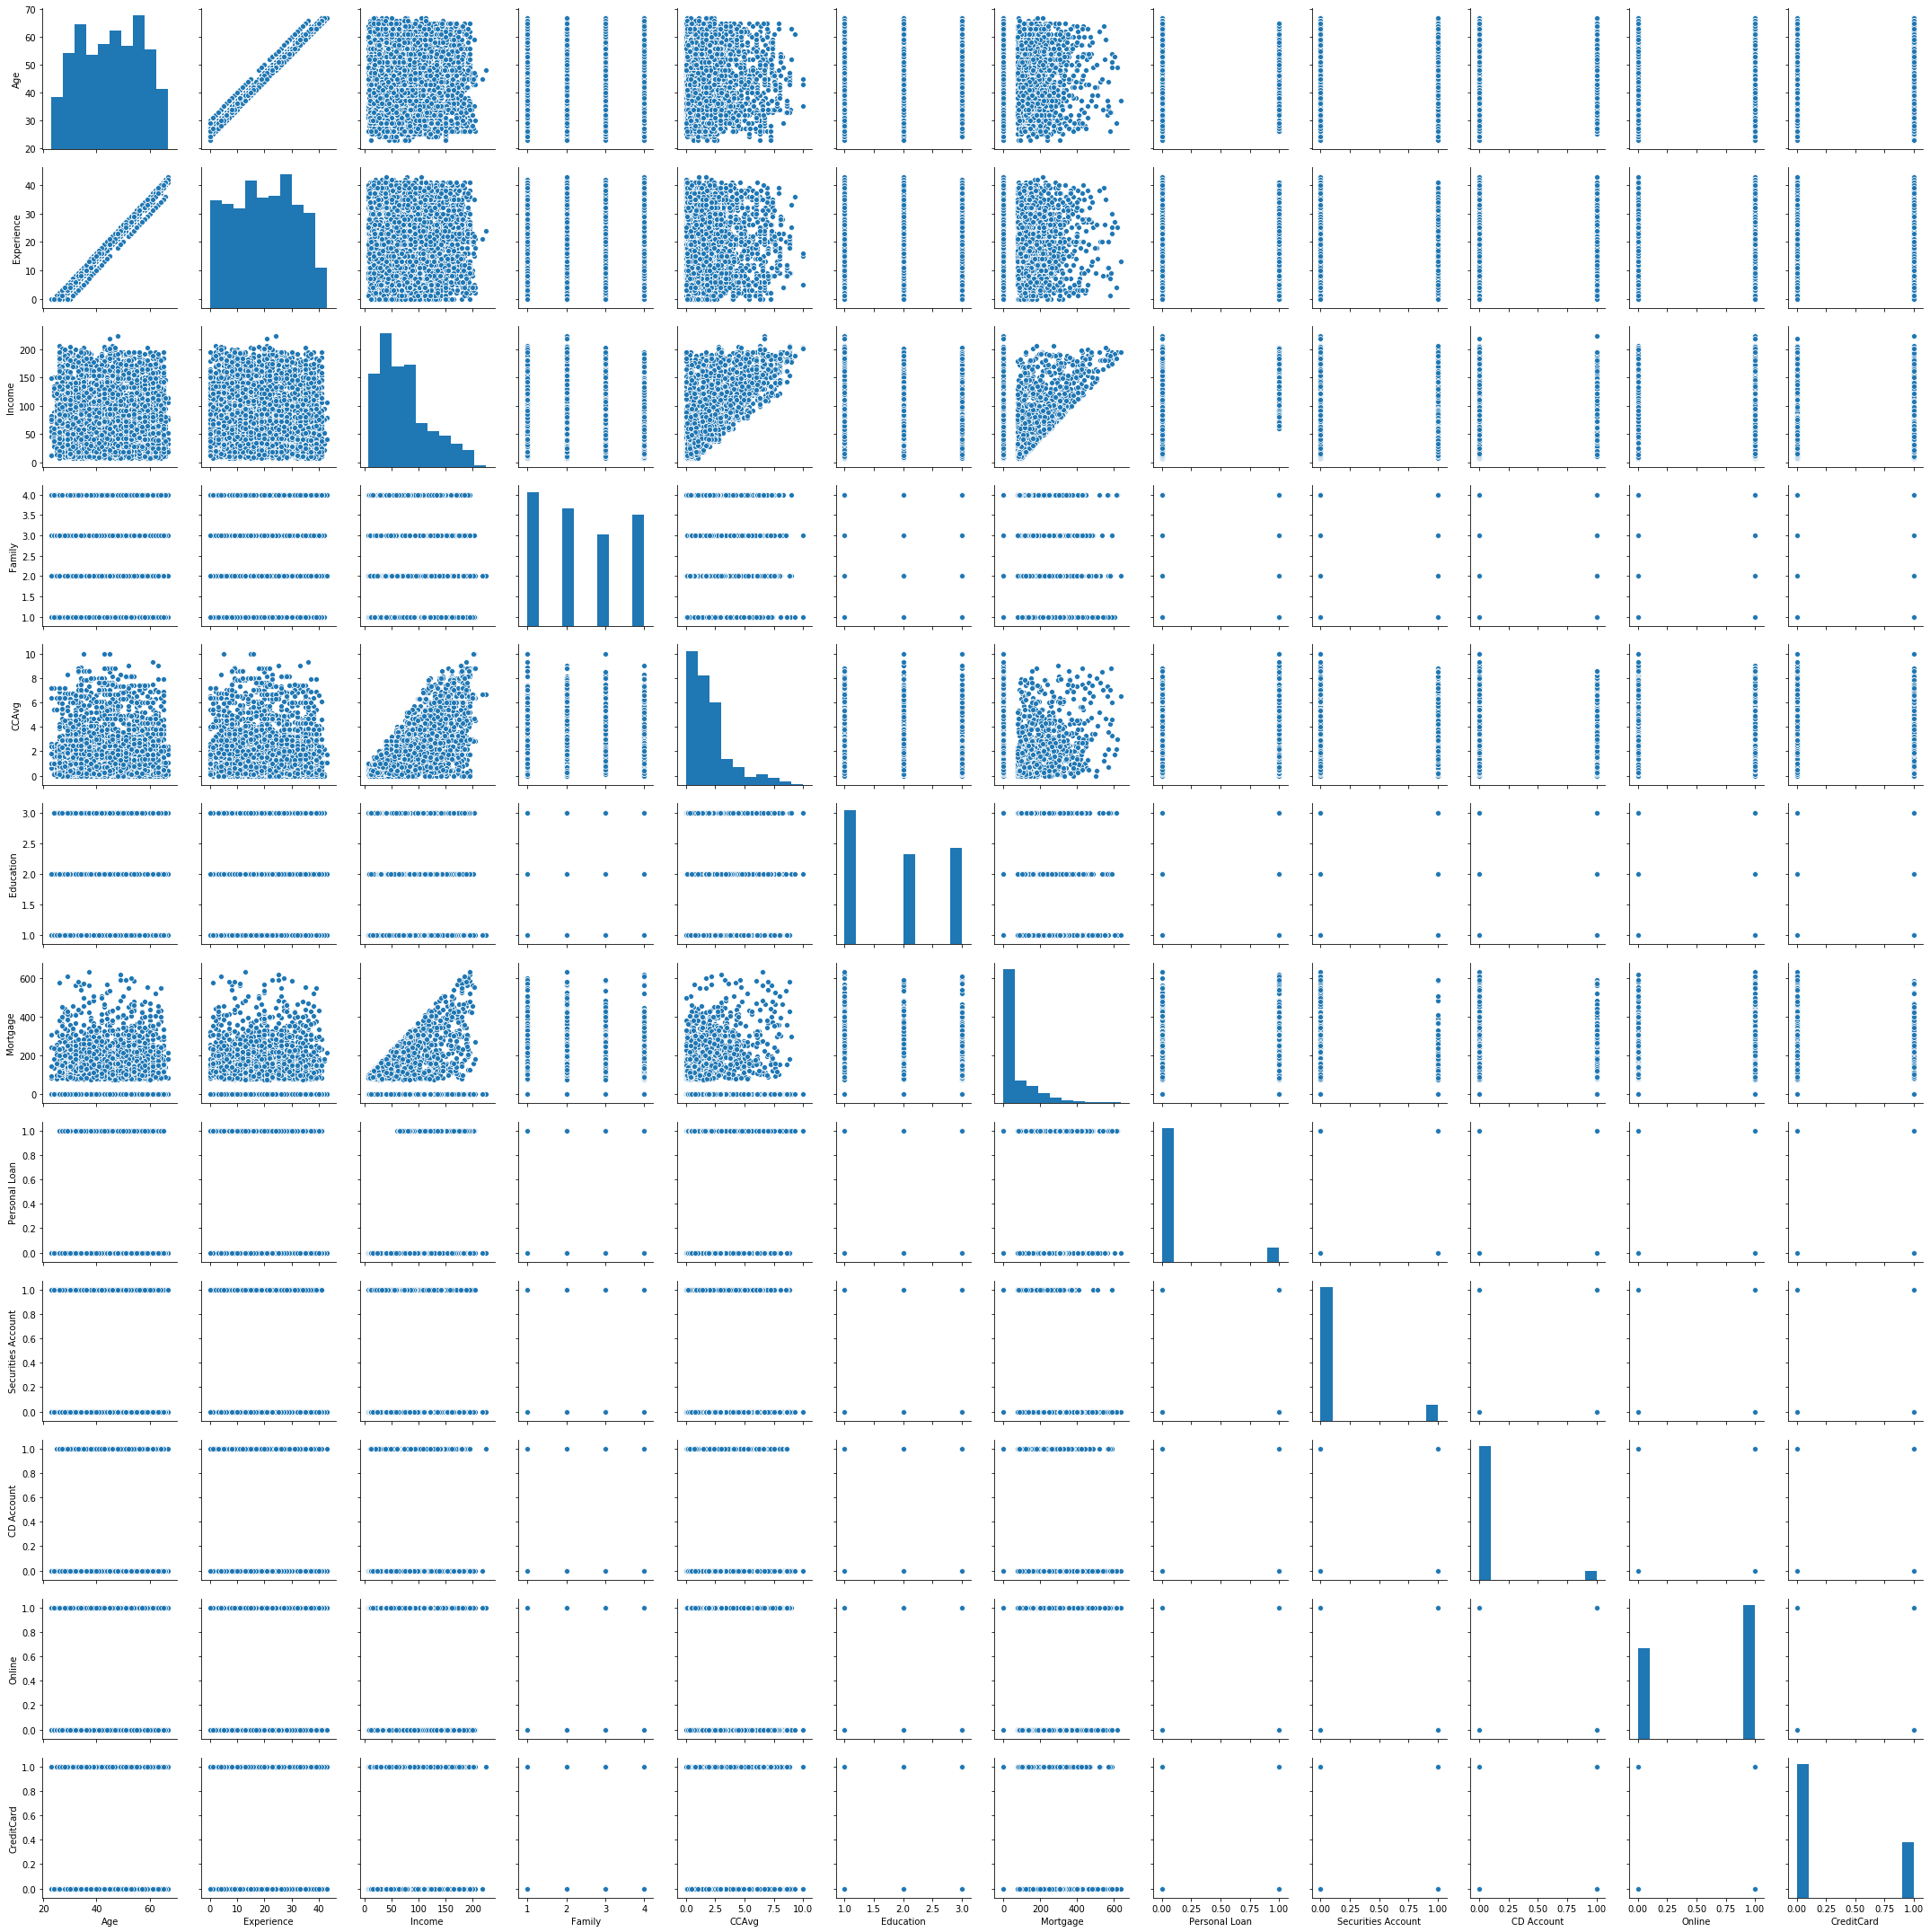

In [27]:
sns.pairplot(data)

### From the correlation matrix below Income,CCAvg and CD Acc has strong correlation with target variable Personal Loan

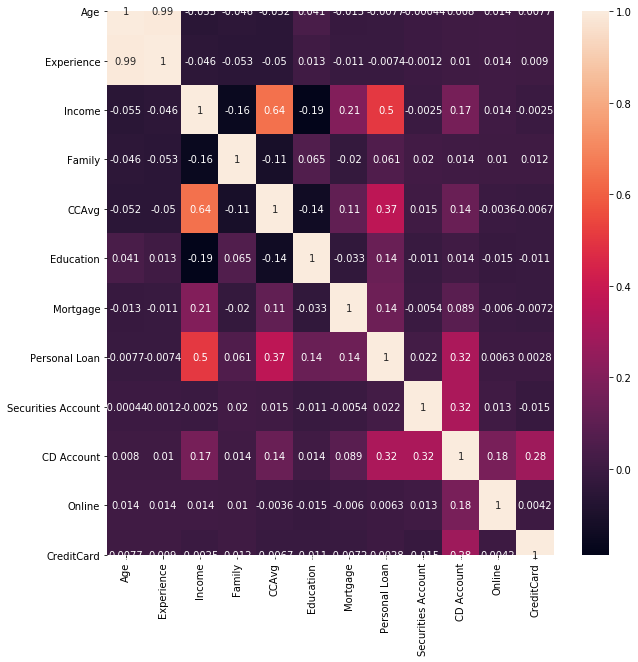

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

In [28]:
data.corr().loc['Personal Loan']

Age                  -0.007726
Experience           -0.007858
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

### Prepare the data for modelling. 

In [29]:
X = data.drop('Personal Loan',axis=1)
Y = data['Personal Loan']


### Split the data into 70:30 ratio for training and test

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [31]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Use Logistic Regression

In [32]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)


0.946


### Use KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
y_predict_KNN = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.9093333333333333

###  Use Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
NB = GaussianNB()
NB.fit(x_train,y_train)
y_predict_NB = NB.predict(x_test)
NB.score(x_test, y_test)

0.8746666666666667

### Print confusion matrix and classification report for Logistic regression

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[1334   17]
 [  64   85]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.68       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



### Confusion Matrix and classification Report for KNN

In [50]:
print(confusion_matrix(y_test, y_predict_KNN))
print(classification_report(y_test, y_predict_KNN))

[[1311   40]
 [  96   53]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.57      0.36      0.44       149

    accuracy                           0.91      1500
   macro avg       0.75      0.66      0.69      1500
weighted avg       0.90      0.91      0.90      1500



### Print Confusion Matrix and Classification Report for Naive Bayes

In [51]:
print(confusion_matrix(y_test, y_predict_NB))
print(classification_report(y_test, y_predict_NB))

[[1231  120]
 [  64   85]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

